## Name: Sidra Fatima
### Data Science and Business Analytics Intern @ The Sparks Foundation
### Task-4: Exploratory Data Analysis (EDA) - Terrorism
### Description: Try to ﬁnd out the hot zone of terrorism, What all security issues and insights you can derive by EDA? 
#### Dataset : globalterrorismdb_0718dist.csv [https://bit.ly/2TK5Xn5]

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
data=pd.read_csv("globalterrorismdb_0718dist.csv")

##### Let's take a look at the first five items in our dataset.

In [2]:
data.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


##### Let's find out how many entries there are in our dataset.


In [3]:
data.shape

(181691, 135)

Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations.

In [4]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

##### Rename some of the columns so that they make sense.


In [5]:
data.rename(columns={'iyear': 'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Country','region_txt':'Region','provstate':'State','city':'City','latitude':'latitude',
    'longitude':'longitude','summary':'summary','attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
     'nwound':'Wound'},inplace=True)

#####  select the columns that are informative to us for visualization (eg. Country, Attacktype, Group).


In [6]:
data = data[['Year','Month','day','Country','State','Region','City','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]

##### let's view the first five elements and see how the dataframe was changed


In [7]:
data.head()

,Year,Month,day,Country,State,Region,City,latitude,longitude,Attacktype,kill,Wound,target1,summary,Group,Targettype,Weapon,motive
0,1970,7,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


##### For consistency, ensure that all column labels of type string.


In [8]:
all(isinstance(column, str) for column in data.columns)

True

In [9]:
data['kill'] = data['kill'].fillna(0)
data['Wound'] = data['Wound'].fillna(0)

In [10]:
data['casualities'] = data['kill'] + data['Wound']

In [11]:
data.shape

(181691, 19)

So now our dataframe has 19 columns instead of 135 columns that we had before.


In [12]:
data.describe()

,Year,Month,day,latitude,longitude,kill,Wound,casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181691.000000,181691.000000,181691.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.266860,2.883296,5.150156
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.227057,34.309747,40.555416
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


# Visualizing Data<a id="4"></a>


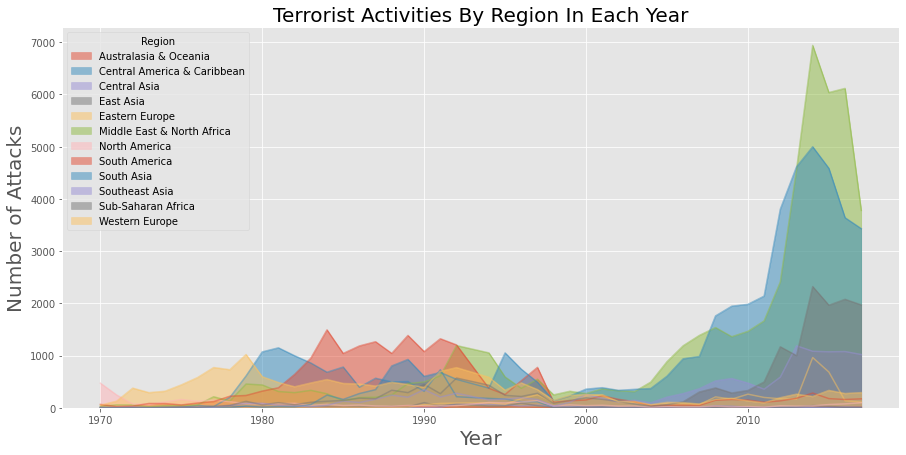

In [13]:
pd.crosstab(data.Year, data.Region).plot(kind='area',stacked=False,figsize=(15,7))
plt.title('Terrorist Activities By Region In Each Year',fontsize=20)
plt.ylabel('Number of Attacks',fontsize=20)
plt.xlabel("Year",fontsize=20)
plt.show()

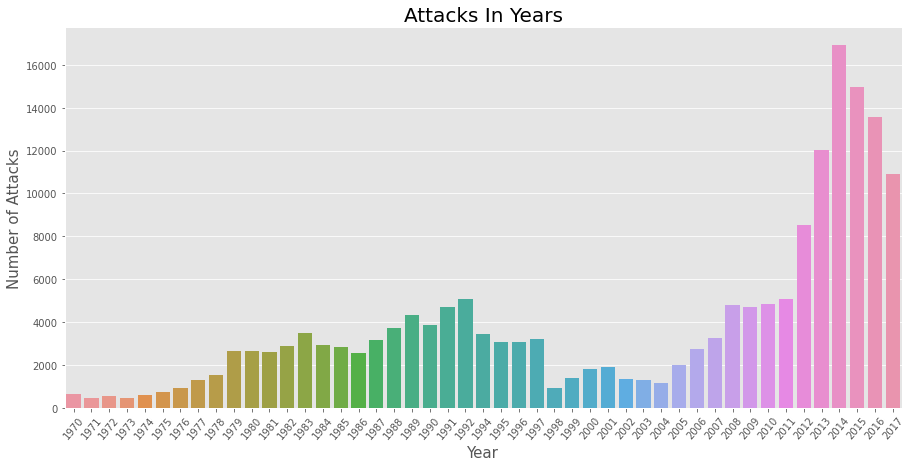

In [14]:
year = data['Year'].unique()
years_count = data['Year'].value_counts(dropna = False).sort_index()
plt.figure(figsize = (15,7))
sns.barplot(x = year,
           y = years_count)
plt.xticks(rotation = 50)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Number of Attacks',fontsize=15)
plt.title('Attacks In Years',fontsize=20)
plt.show()


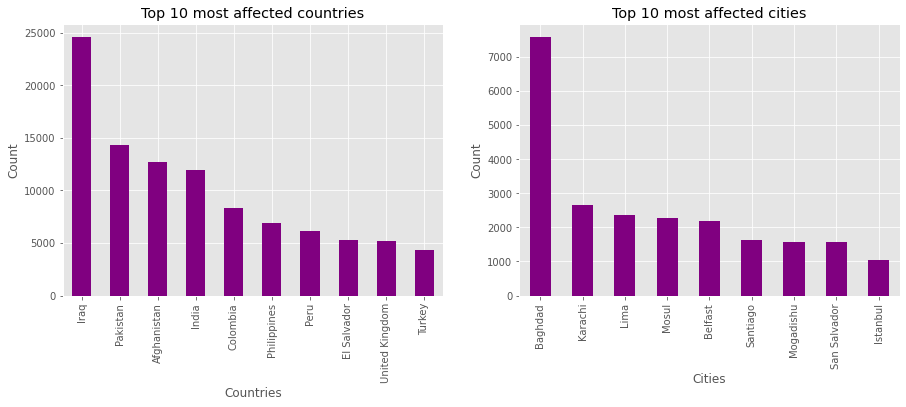

In [15]:
plt.subplot(1,2,1)
df=data.Country.value_counts()[:10]
df.plot(kind='bar',figsize=(15,5), color="purple")
plt.title('Top 10 most affected countries')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.subplot(1,2,2)
df2=data.City.value_counts()[1:10]
df2.plot(kind='bar',figsize=(15,5),color="purple")
plt.title('Top 10 most affected cities')
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()


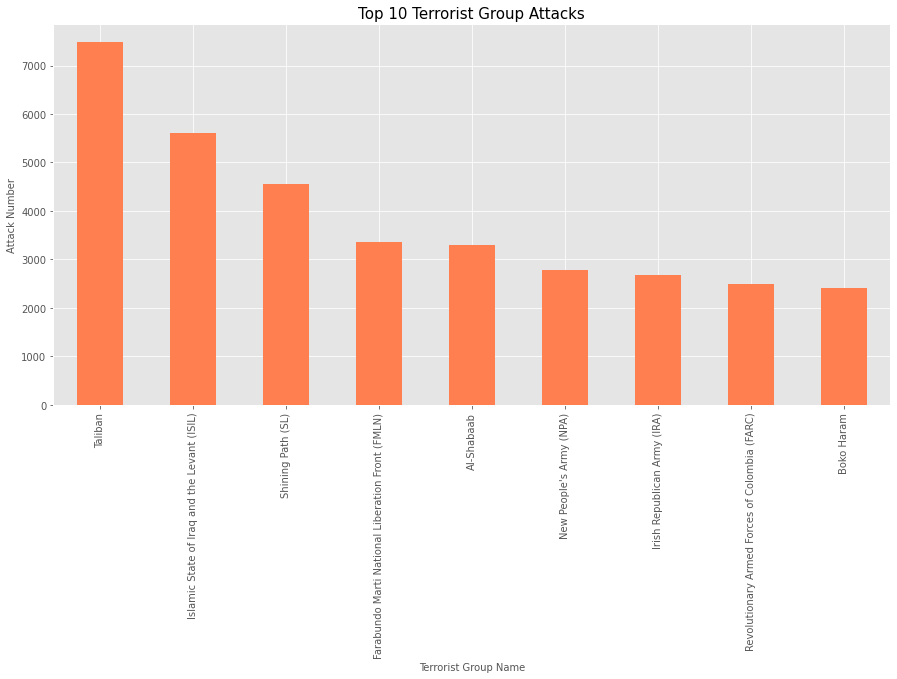

In [35]:
df2=data.Group.value_counts()[1:10]
df2.plot(kind='bar', color = "coral",
         figsize=(15, 7), # pass a tuple (x, y) size
             )
plt.title("Top 10 Terrorist Group Attacks",fontsize=15)
plt.xlabel("Terrorist Group Name",fontsize=10)
plt.ylabel("Attack Number",fontsize=10)
plt.show()

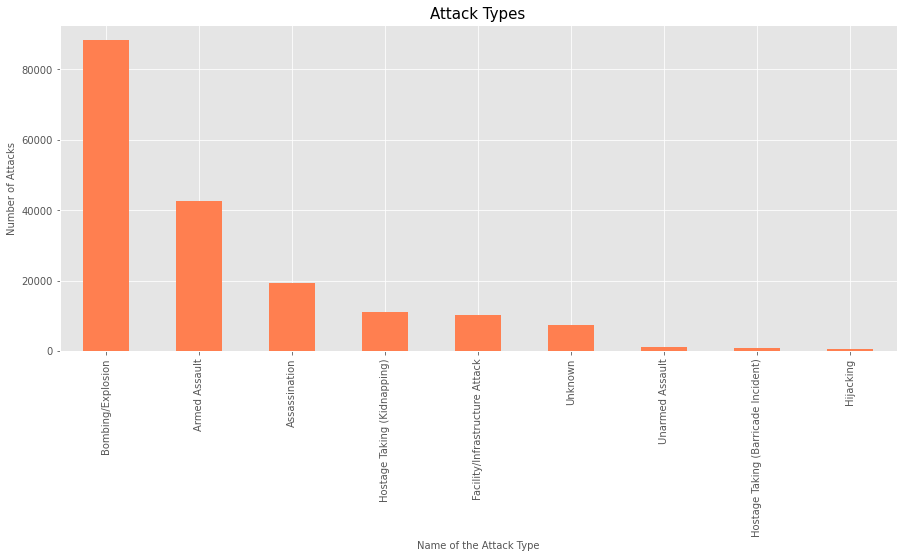

In [37]:
data['Attacktype'].value_counts().plot(kind='bar',figsize=(15,6),color='coral')
plt.xlabel("Name of the Attack Type",fontsize=10)
plt.ylabel("Number of Attacks",fontsize=10)
plt.title("Attack Types",fontsize=15)
plt.show()

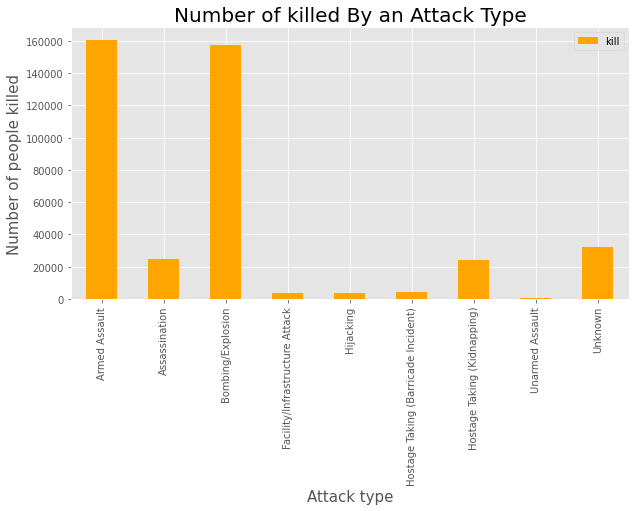

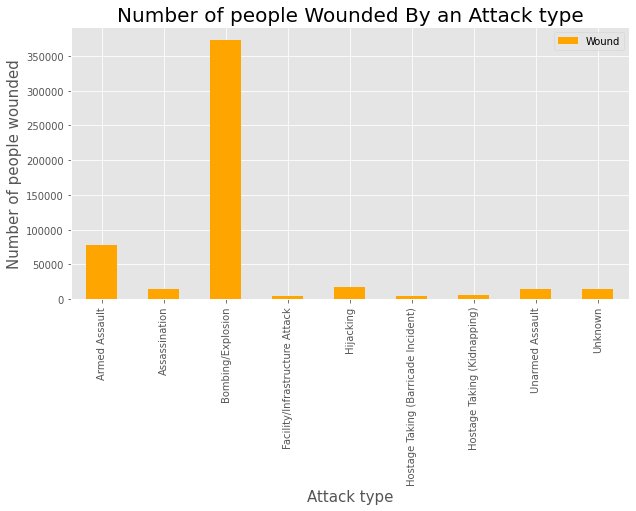

In [27]:
data[['Attacktype','kill']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(10,5),color=['orange'])
plt.title("Number of killed By an Attack Type",fontsize=20)
plt.ylabel('Number of people killed',fontsize=15)
plt.xlabel('Attack type',fontsize=15)
data[['Attacktype','Wound']].groupby(["Attacktype"],axis=0).sum().plot(kind='bar',figsize=(10,5),color=['orange'])
plt.title("Number of people Wounded By an Attack type",fontsize=20)
plt.ylabel("Number of people wounded",fontsize=15)
plt.xlabel("Attack type",fontsize=15)
plt.show()

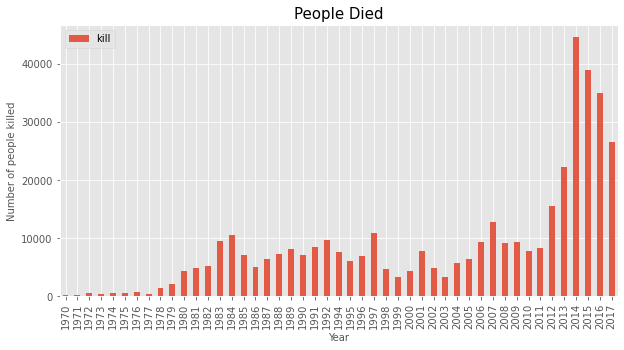

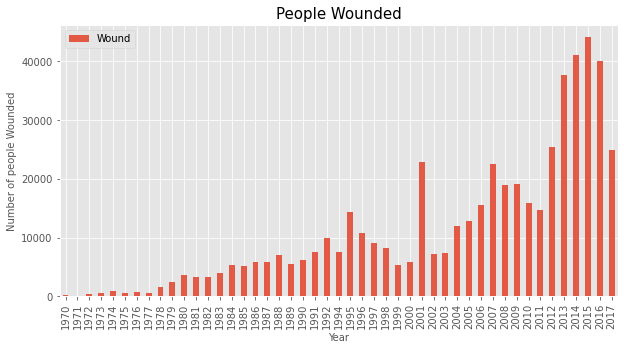

In [17]:
df = data[['Year','kill']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(10,5))
df.plot(kind='bar',alpha=0.9,ax=ax4)
plt.title("People Died",fontsize=15)
plt.ylabel("Number of people killed",fontsize=10)
plt.xlabel('Year',fontsize=10)
df = data[['Year','Wound']].groupby(['Year']).sum()
fig, ax4 = plt.subplots(figsize=(10,5))
df.plot(kind='bar',alpha=0.9,ax=ax4)
plt.title("People Wounded",fontsize=15)
plt.ylabel("Number of people Wounded",fontsize=10)
plt.xlabel('Year',fontsize=10)
plt.show()

In [19]:
kill = data.loc[:,'kill']
print('Number of people killed by terror attack:', int(sum(kill.dropna())))

Number of people killed by terror attack: 411868


In [20]:
typeKill = data.pivot_table(columns='Attacktype', values='kill', aggfunc='sum')
typeKill

Attacktype,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
kill,160297.0,24920.0,157321.0,3642.0,3718.0,4478.0,24231.0,880.0,32381.0


## Conclusion and Results :

### Hot Zone of Terrorism: 

Region: <b>Middle East & North Africa</b>

Country: <b>Iraq</b>

City: <b>Baghdad</b>

Group with the most attacks: <b>Taliban</b>

Most Attack Types: <b>Bombing/Explosion</b>

Year with the most attacks: <b>2014</b>

Month with the most attacks: <b>5</b>




